Help on function initialize_parameters in module __main__:

initialize_parameters(layer_dims)
    "layer dims" is a list consiting of number of input features and hidden units in each layer
    initalize_parameters() initializes parameters of all hidden layers 
    
    >>> initalize_parameters([4,10,15,25,10])
            return parameters

{'W1': array([[ 0.35122995, -0.09776762,  0.45798496,  1.07694474],
       [-0.16557144, -0.16555983,  1.11667209,  0.5426583 ],
       [-0.33196852,  0.38364789, -0.32768579, -0.32932067],
       [ 0.17109316, -1.35289344, -1.2197011 , -0.39759732],
       [-0.71617975,  0.22220642, -0.64206998, -0.99864952],
       [ 1.03637018, -0.15964795,  0.04774965, -1.0074491 ],
       [-0.38493672,  0.07843412, -0.81387536,  0.26565862],
       [-0.42471569, -0.20625863, -0.42547083,  1.30975846],
       [-0.00954398, -0.74791457,  0.58162709, -0.86326682],
       [ 0.14768886, -1.38569603, -0.93916936,  0.13920191]]), 'b1': array([[0.],
       [0.],
     

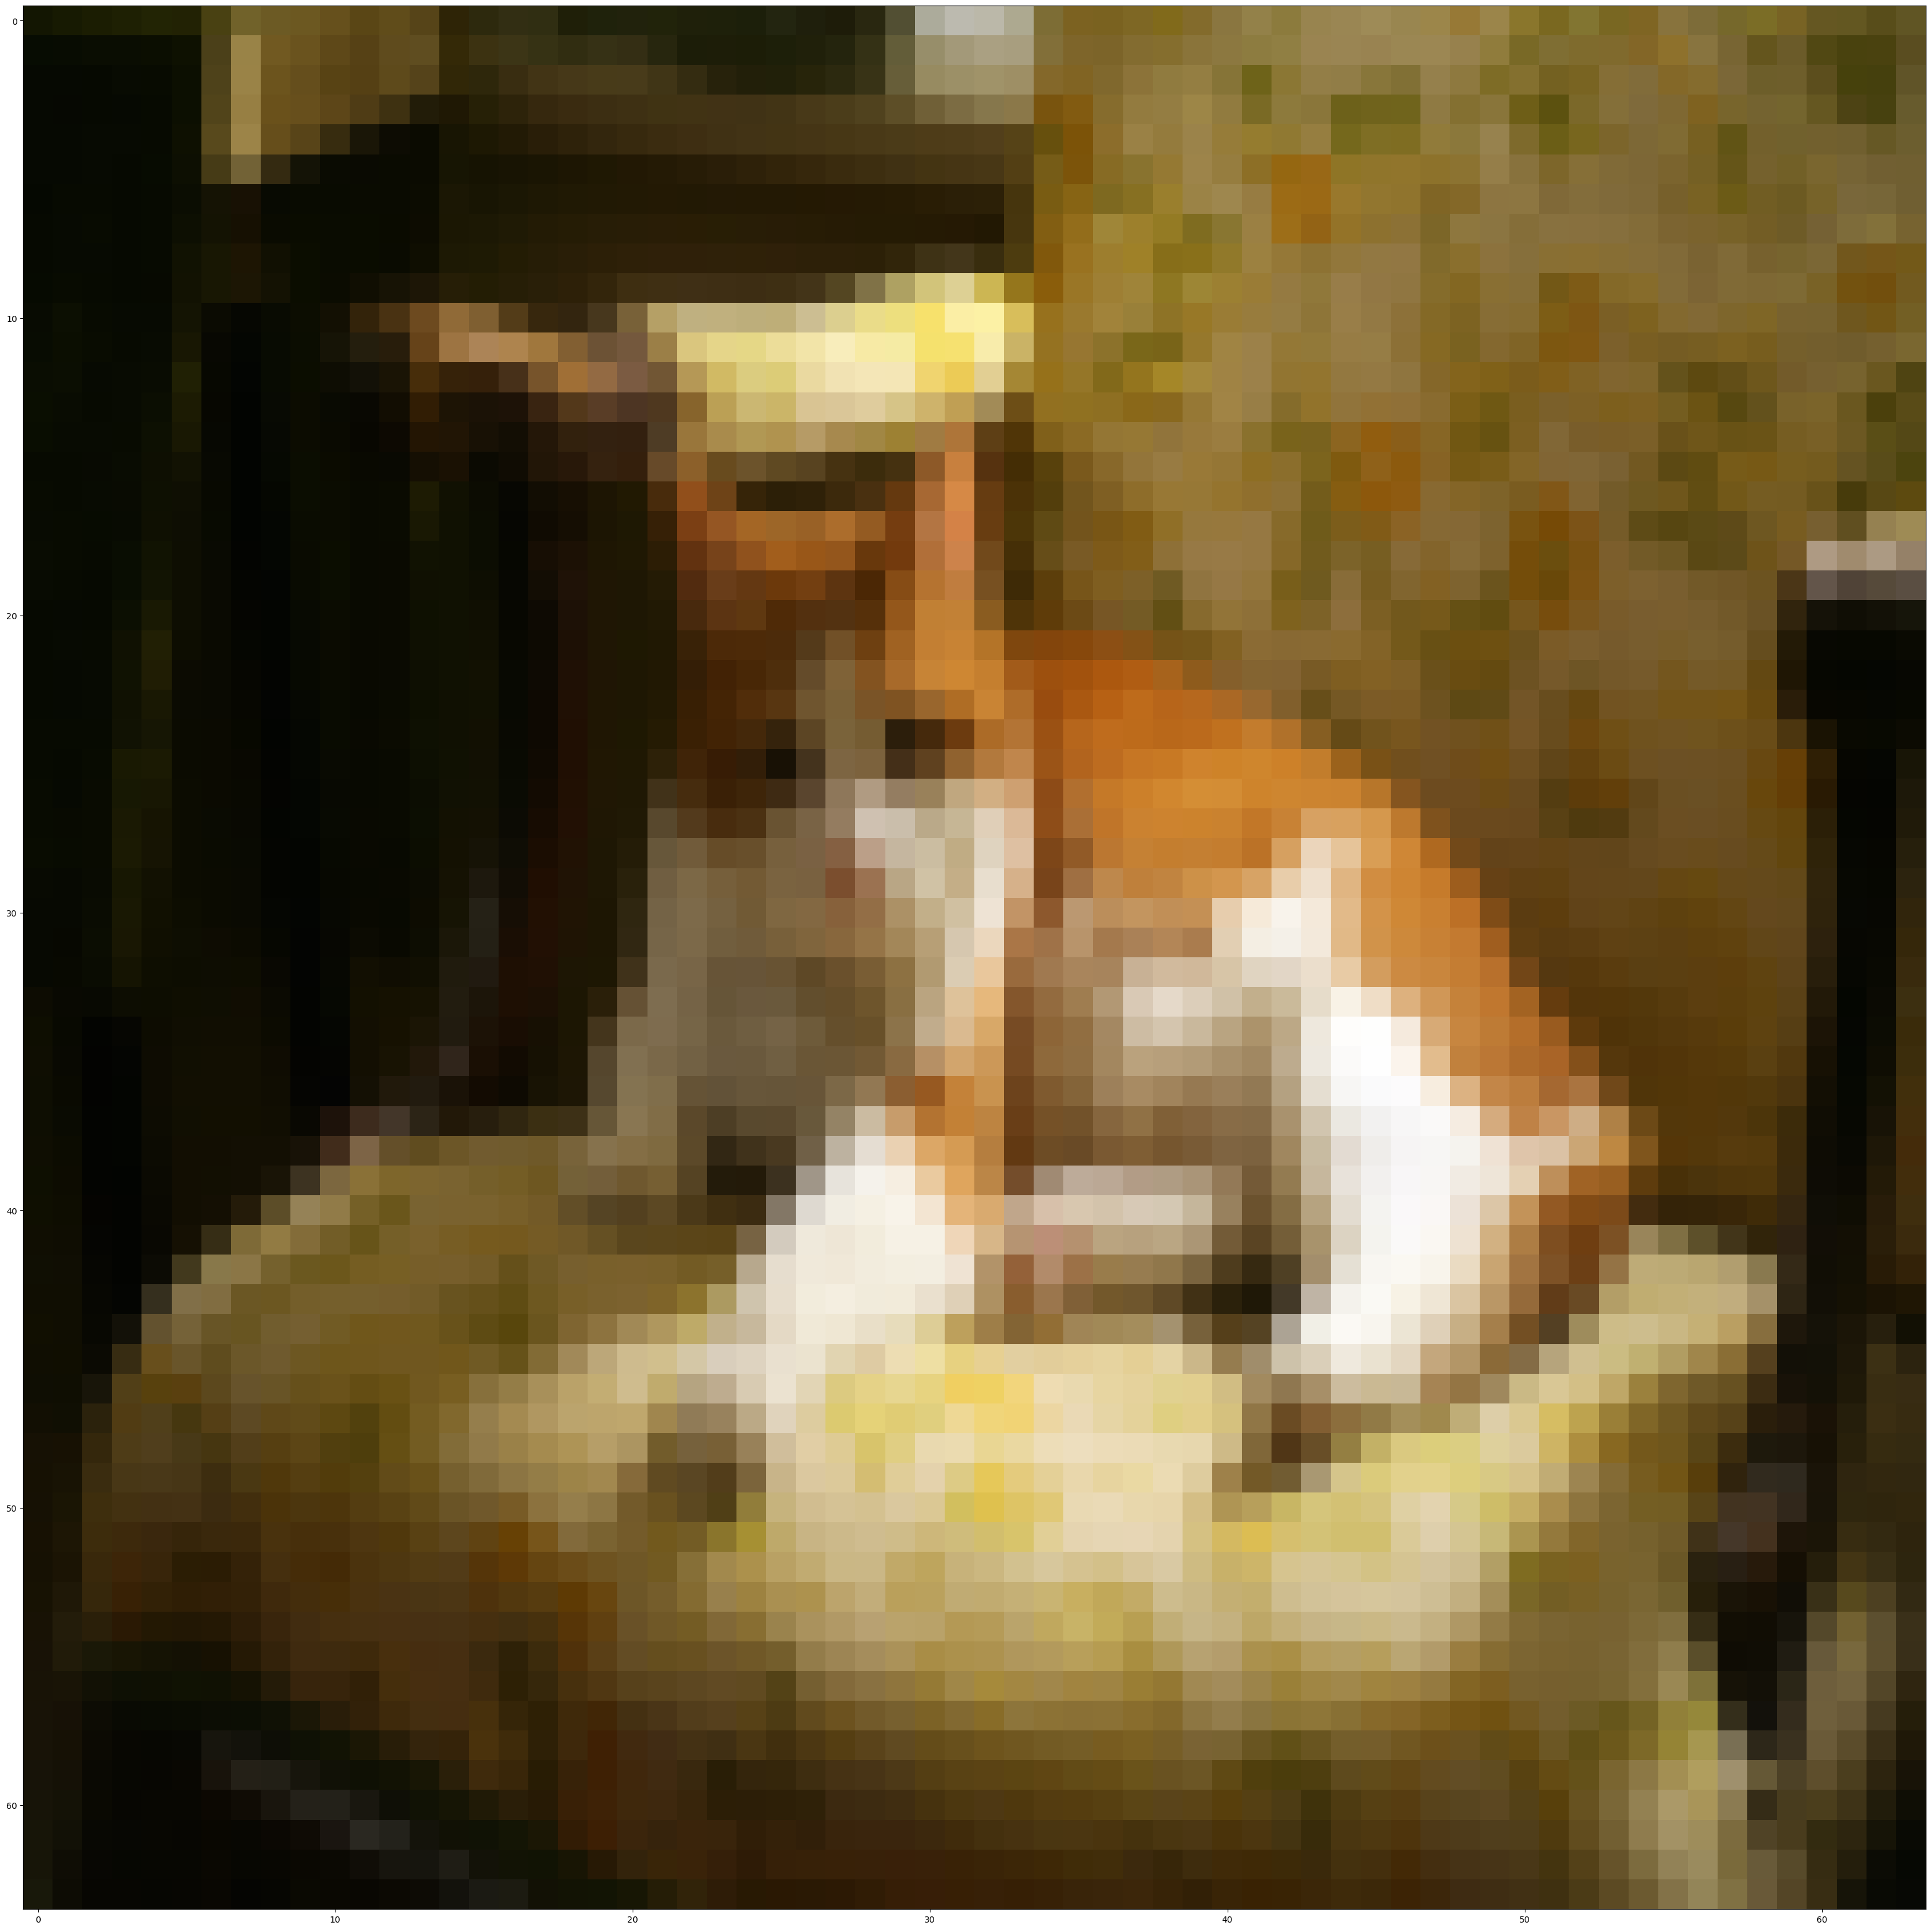

(12288, 209)
(12288, 50)
(1, 209)
(1, 209)
Cost after iteration 0: 0.6582343678496099
Cost after iteration 100: 0.5635269577730566
Cost after iteration 200: 0.44733082713333555
Cost after iteration 300: 0.34447896745364587
Cost after iteration 400: 0.2603674435296316
Cost after iteration 500: 0.2182831833899715
Cost after iteration 600: 0.20032905756676112
Cost after iteration 700: 0.14720223670911756
Cost after iteration 800: 0.12259849302729886
Cost after iteration 900: 0.10734707693954666
Cost after iteration 1000: 0.09077960969594862
Cost after iteration 1100: 0.08010247494000958
Cost after iteration 1200: 0.07214111652115612
Cost after iteration 1300: 0.06575108381199206
Cost after iteration 1400: 0.06027618949331922
Cost after iteration 1500: 0.05788724747111166
Cost after iteration 1600: 0.05197073885844177
Cost after iteration 1700: 0.048993356260515875
Cost after iteration 1800: 0.04613990563988436
Cost after iteration 1900: 0.043798637092586155
Cost after iteration 2000: 0.04

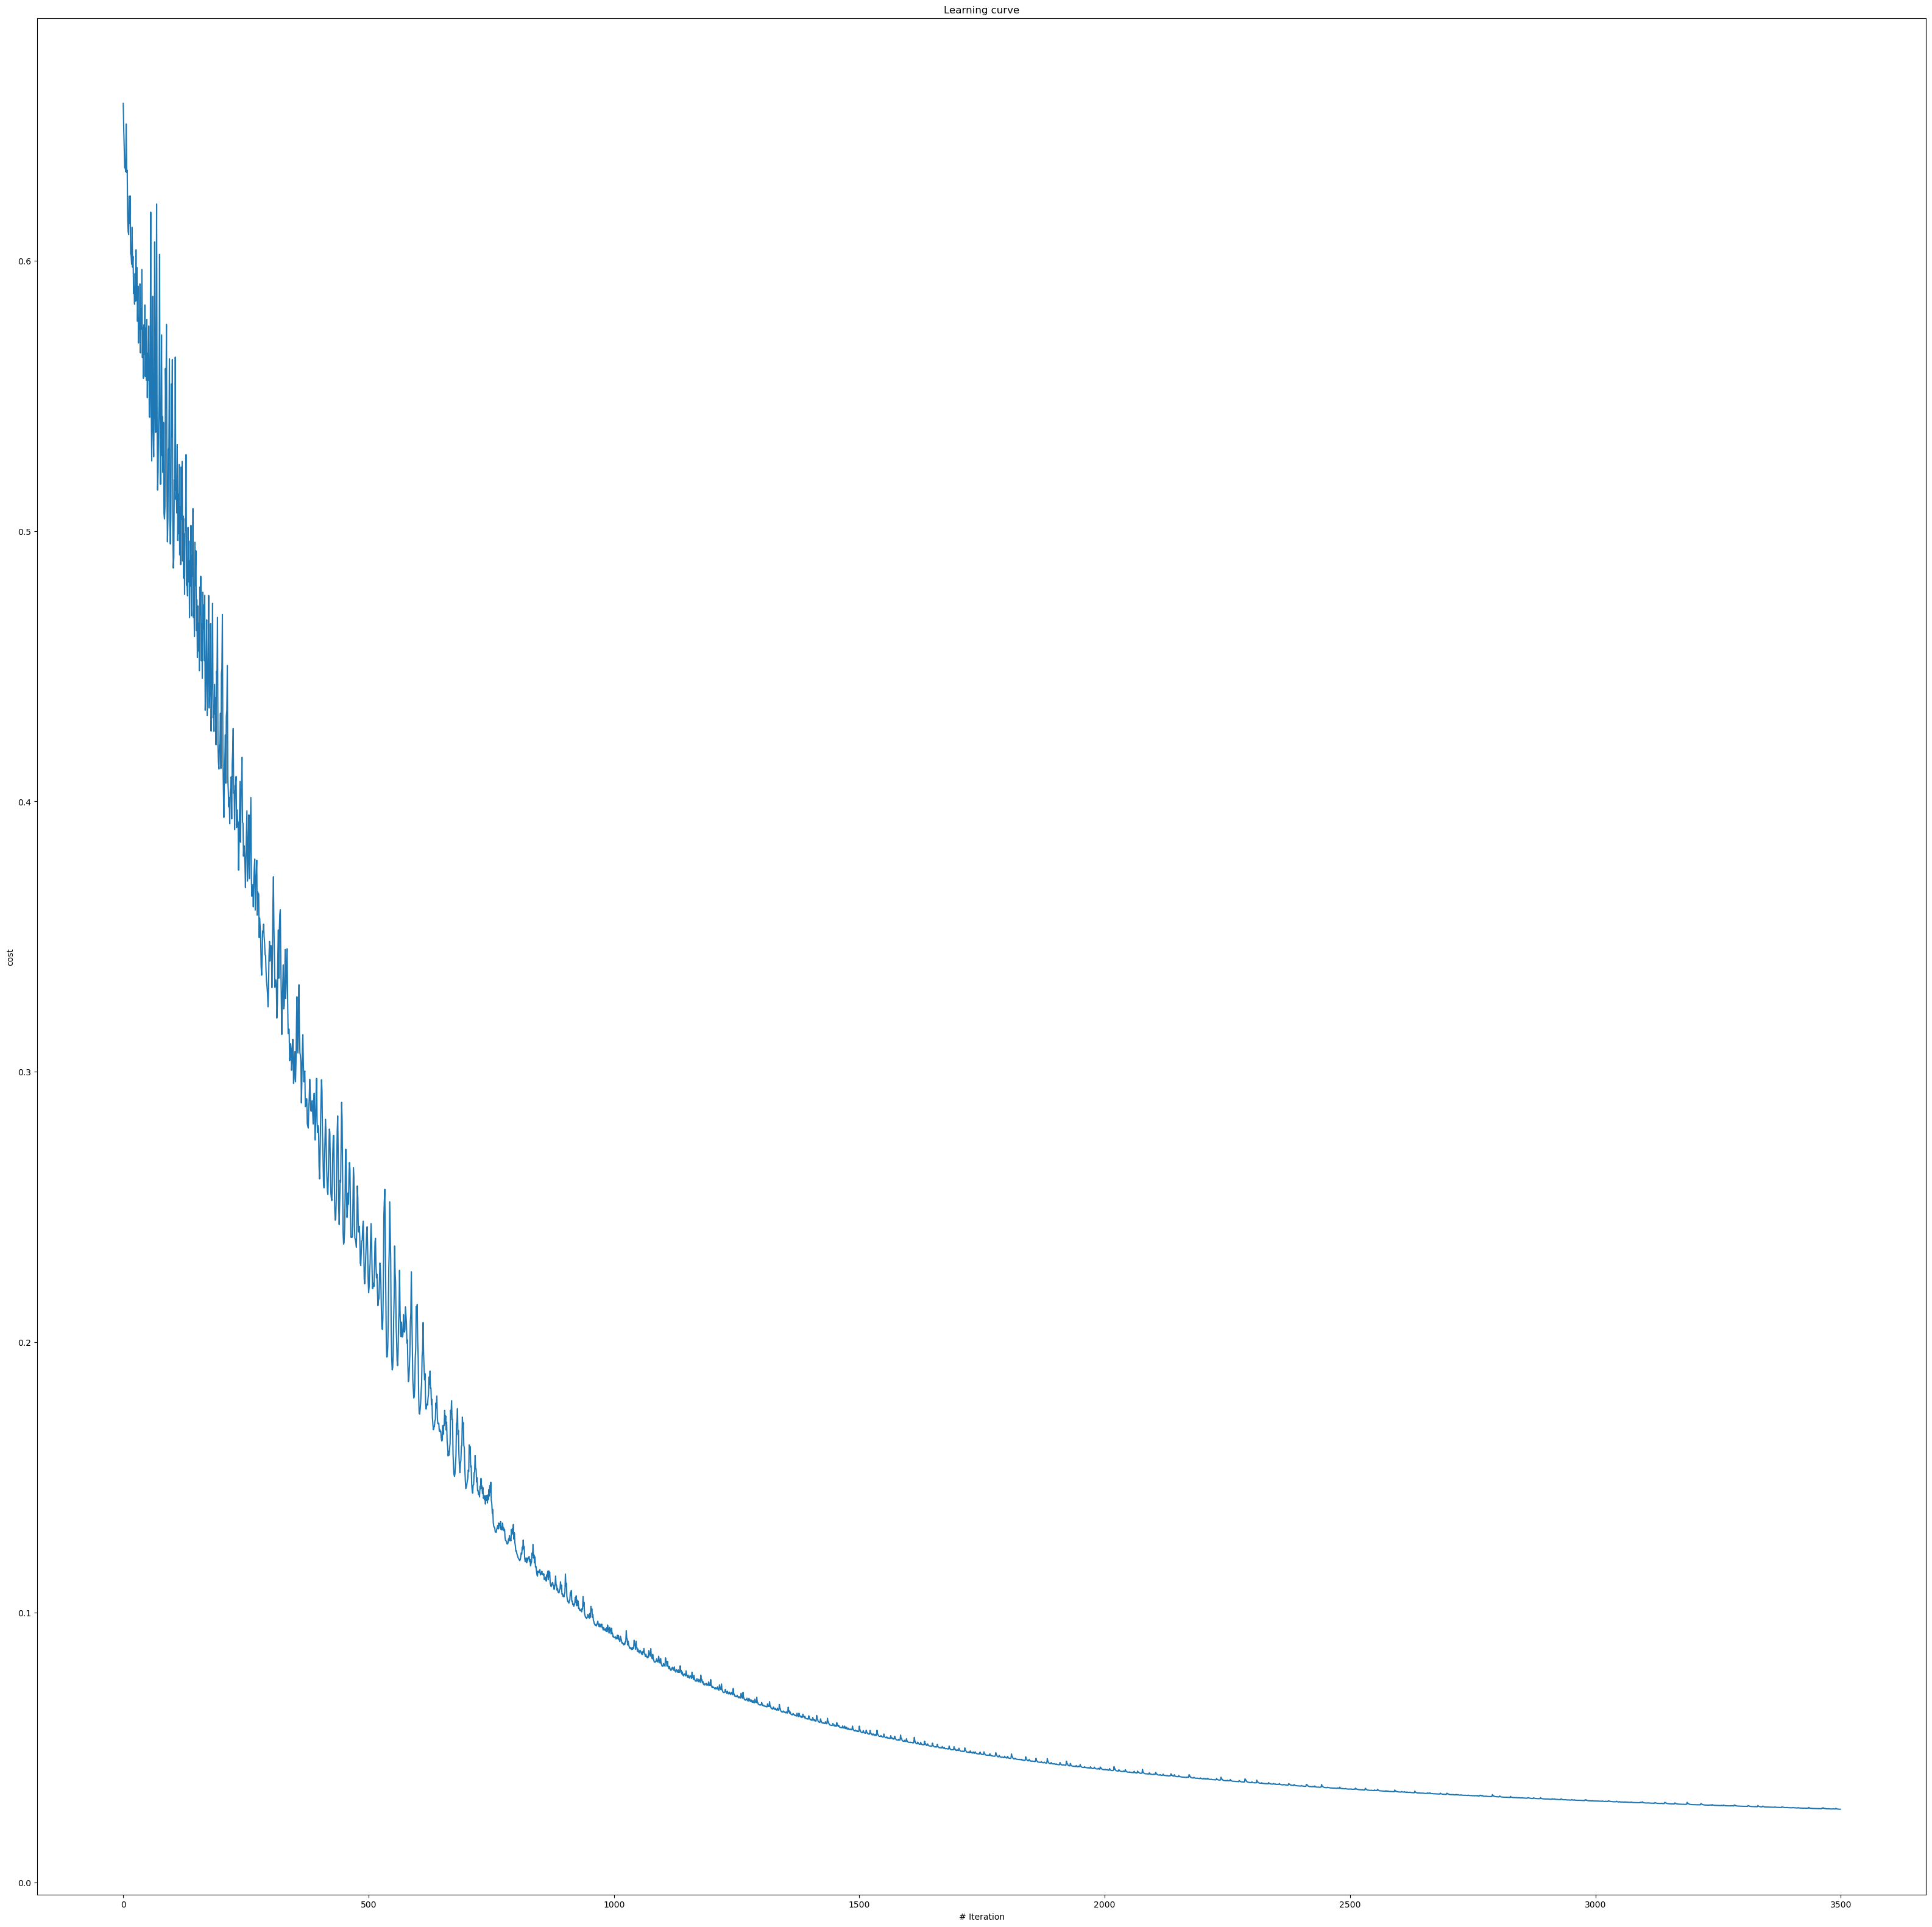

1.0
0.72


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
np.random.seed(42)

def sigmoid(Z):
    """
    Implements sigmoid non linear activation to linear output
    Z-> linear output
    """
    A=1/(1+np.exp(-Z))
    cache=Z
    return A,cache

def relu(Z):
    """
    Implements relu non linear activation to linear output
    Z-> linear output
    """
    A=np.maximum(0,Z)
    cache=Z
    return A,cache

def tanh(Z):
    """
    Implements tanh non linear activation to linear output
    Z-> linear output
    """
    A=np.tanh(Z)
    cache=Z
    return A,cache

def initialize_parameters(layer_dims):
    """ 
    "layer dims" is a list consiting of number of input features and hidden units in each layer
    initalize_parameters() initializes parameters of all hidden layers 

    >>> initalize_parameters([4,10,15,25,10])
            return parameters
    """
    
    np.random.seed(42)
    L=len(layer_dims)
    parameters={}

    
    for i in range(1,L):
        
        parameters["W"+str(i)]=np.random.randn(layer_dims[i],layer_dims[i-1])*np.sqrt(2/layer_dims[i-1])
        parameters["b"+str(i)]=np.zeros((layer_dims[i],1))
        
        assert(parameters["W"+str(i)]).shape==(layer_dims[i],layer_dims[i-1])
        assert(parameters["b"+str(i)]).shape==(layer_dims[i],1)
        
    return parameters
  

      

help(initialize_parameters)

parameters=initialize_parameters([4,10,15,25,10])

print(parameters)

def linear_activation_layer(A_prev,W,b,activation):

    """
    linear_activation_layer has four parameters X,W,b,activatuion
    A_prev-> input feature matrix
    W-> weight matirx
    b-> bias matrix
    activation-> applied non-linearity
    
    """
    Z=np.matmul(W,A_prev)+b
    linear_cache=(A_prev,W,b)
    
    if activation=="relu":
        A,activation_cache=relu(Z)
        
    elif activation=="sigmoid":
        A,activation_cache=sigmoid(Z)
        
    elif activation=="tanh":
        A,activation_cache=tanh(Z)
        
    cache=(linear_cache,activation_cache)
    assert(Z.shape==A.shape)
    assert(A.shape==(W.shape[0],A_prev.shape[1]))
    return A,cache    

X=np.random.randn(4,6)
W=np.random.randn(5,4)
b=np.random.randn(5,1)

A,cache=linear_activation_layer(X,W,b,"relu")

print(cache)

def L_layer_deep_forward_layer(X,parameters):
    """ 
    L_layer_deep_forward_layer implements forward propagation part of Neural Netwrok
    X -> input feature matrix
    parameters -> A set containing all weight matrix and bias vector
    
    """

    
    L=len(parameters)//2
    A_in=X
    caches=[]
    
    for i in range(1,L):
        A_out,cache=linear_activation_layer(A_in,parameters["W"+str(i)],parameters["b"+str(i)],"relu")
        A_in=A_out
        caches.append(cache)
        
    A_L,cache=linear_activation_layer(A_in,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
    caches.append(cache)
    
    return A_L,caches

A_L,caches=L_layer_deep_forward_layer(X,parameters)


print(cache)

def compute_cost(y,y_pred):
    """
    Implement the binary crossntropy function 
    y-> target label
    y_pred-> predicted label
    
    """
    loss=-(y*np.log(y_pred+1e-15)+(1-y)*np.log(1-y_pred+1e-15))
    
    cost=np.mean(loss)
    cost=np.squeeze(cost)
    return cost

y=np.random.randn(100,1)<=0.06
y_pred=abs(np.random.randn(100,1))*0.1

print(compute_cost(y,y_pred))

def linear_backward(dZ,linear_cache):
    """
    Implement 'single layer' linear backpropagation 
    dZ-> gradient of cost function w.r.t to linear output
    cache-> it is a tuple coming from linear activation layer 
    
    """
    m=dZ.shape[1]
    A_prev,W,b=linear_cache
    
    dW=np.matmul(dZ,A_prev.T)/m
    db=np.mean(dZ,axis=1,keepdims=True)
    dA_prev=np.matmul(W.T,dZ)
    
    return dW,db,dA_prev

def sigmoid_backward(dA,activation_cache):
    Z=activation_cache
    
    
    A=1/(1+np.exp(-Z))
 
    return dA*A*(1-A)

def relu_backward(dA,activation_cache):
    Z=activation_cache
    return dA*np.where(Z>0,1,0)

def tanh_backward(dA,activation_cache):
    Z=activation_cache
    return dA*(1-np.tanh(Z)**2)

def linear_activation_backward(dA,cache,activation):
    linear_cache,activation_cache=cache
    
    if activation=="relu":
        dZ=relu_backward(dA,activation_cache)
        
    elif activation=="sigmoid":
        dZ=sigmoid_backward(dA,activation_cache)
        
        
    elif activation=="tanh":
        dZ=tanh_backward(dA,activation_cache)
    
    dW,db,dA_prev=linear_backward(dZ,linear_cache)  
    return dW,db,dA_prev

print(caches)

def L_layer_backward(A_L,y,caches):
    grads={}
    L=len(caches)
    cache=caches[L-1]
    m=y.shape[0]
    
    dAL=(-np.divide(y,A_L)+np.divide(1-y,1-A_L))
    grads["dW"+str(L)],grads["db"+str(L)],grads["dA"+str(L-1)]=linear_activation_backward(dAL,cache,"sigmoid")
 
    
    for i in reversed(range(L-1)):
        
        cache=caches[i]
     
        grads["dW"+str(i+1)],grads["db"+str(i+1)],grads["dA"+str(i)]=linear_activation_backward(grads["dA"+str(i+1)],cache,"relu")
        
    
    return grads

def update_parameters(parameters,grads,learning_rate):
    L=len(parameters)//2
    for i in range (L):
        parameters["W"+str(i+1)]-=learning_rate*grads["dW"+str(i+1)]
        parameters["b"+str(i+1)]-=learning_rate*grads["db"+str(i+1)]
    return parameters

train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_x = np.array(train_dataset["train_set_x"][:]) 
train_y = np.array(train_dataset["train_set_y"][:]) 

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_x= np.array(test_dataset["test_set_x"][:]) # your test set features
test_y = np.array(test_dataset["test_set_y"][:]) # your test set labels
classes = np.array(test_dataset["list_classes"][:]) # the list of classes
train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

index=7
plt.imshow(train_x[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")
plt.show()

train_X=train_x.reshape(train_x.shape[0],-1).T
test_X=test_x.reshape(test_x.shape[0],-1).T
train_X=train_X/255
test_X=test_X/255

print(train_X.shape)
print(test_X.shape)

print(train_y.shape)

n_x=12288
n_h=7
n_y=1
layer_dims=(n_x,n_h,n_y)

def L_layer_model(X,y,layer_dims,learning_rate,iterations,print_cost=False):
    parameters=initialize_parameters(layer_dims)
    costs=[]
    for i in range(iterations):
        AL,caches= L_layer_deep_forward_layer(X,parameters)
        cost=compute_cost(y,AL)
        grads=L_layer_backward(AL,y,caches)
        parameters=update_parameters(parameters,grads,learning_rate)
        costs.append(cost)
        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    return parameters,costs

print(train_y.shape)

parameters,costs=L_layer_model(train_X,train_y,(12288,7,1),0.0075,3500,print_cost=True)

plt.plot(costs)
plt.xlabel("# Iteration")
plt.ylabel("cost")
plt.title("Learning curve")
plt.show()

def accuracy_of_model(X,y,parameters):
    m=y.shape[1]
    y_pred,cache= L_layer_deep_forward_layer(X,parameters)
    y_pred=(y_pred[0,:]>0.5).astype(int).reshape(1,-1)
    count=np.sum(y_pred[0,:]==y[0,:])
    accuracy=count/m

    return (accuracy)


train_set_error= accuracy_of_model(train_X,train_y,parameters)
test_set_error= accuracy_of_model(test_X,test_y,parameters)

print(train_set_error)
print(test_set_error)

Cost after iteration 0: 0.6548000438013581
Cost after iteration 100: 0.5778471968168285
Cost after iteration 200: 0.2628682001672361
Cost after iteration 300: 0.07749867299971165
Cost after iteration 400: 0.04100453644676416
Cost after iteration 500: 0.021569688640158454
Cost after iteration 600: 0.014502180205054768
Cost after iteration 700: 0.010463950368909083
Cost after iteration 800: 0.00806951378147498
Cost after iteration 900: 0.006468915273607394
Cost after iteration 1000: 0.0053380566393913375
Cost after iteration 1100: 0.004514803775889476
Cost after iteration 1200: 0.0038863306956761615
Cost after iteration 1300: 0.003390705060524603
Cost after iteration 1400: 0.002996616705656365
Cost after iteration 1500: 0.0026769331168966562
Cost after iteration 1600: 0.002411402024536325
Cost after iteration 1700: 0.0021903165092597384
Cost after iteration 1800: 0.0020020134341367135
Cost after iteration 1900: 0.001840754400933196
Cost after iteration 2000: 0.001700888881117369
Cost aft

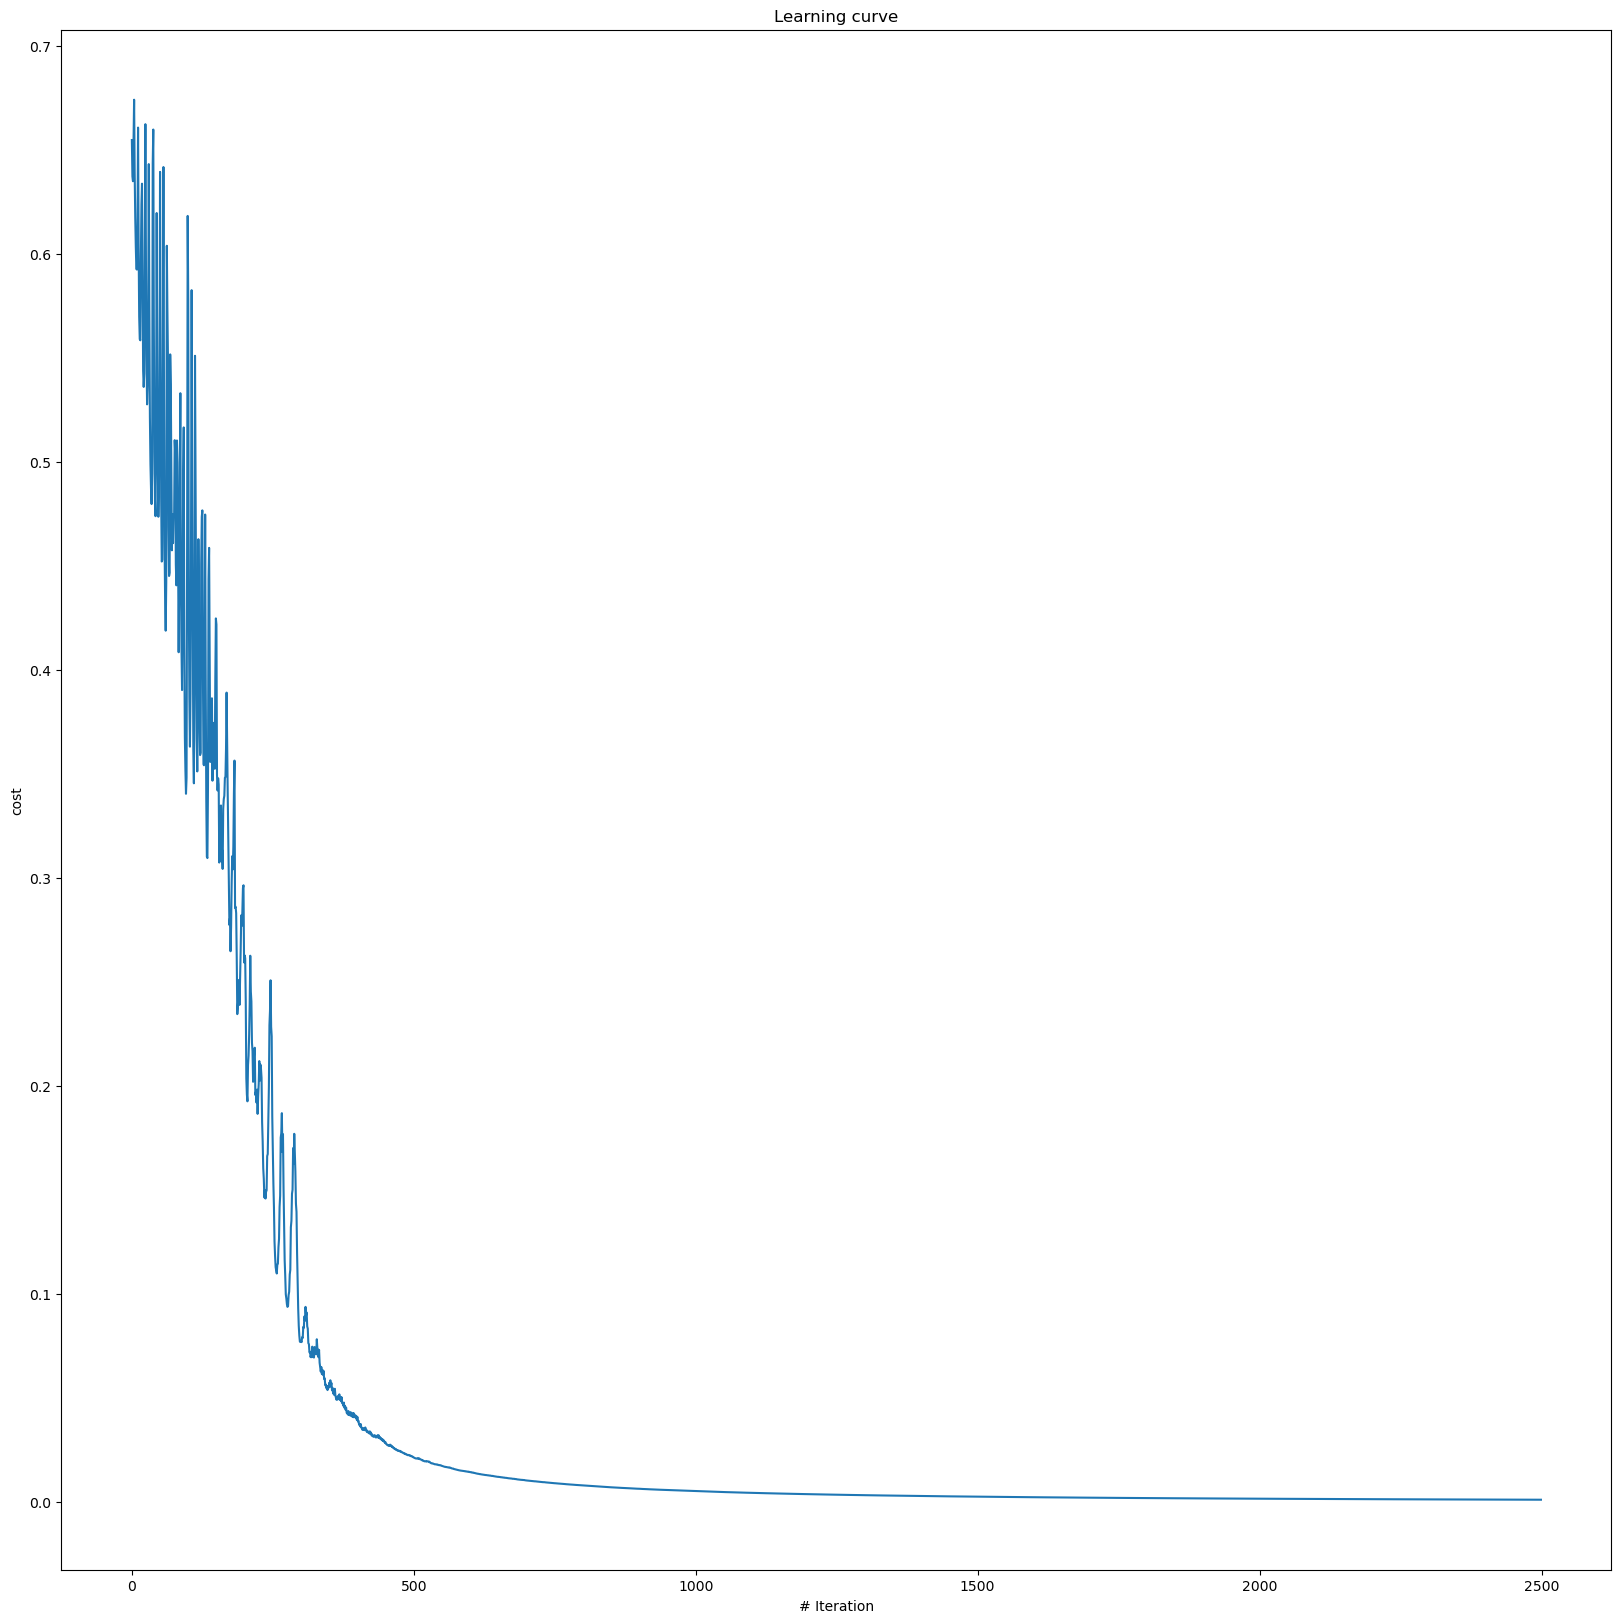

1.0
0.76


In [29]:

layers_dims = [12288,128,64, 32, 16, 1] 
parameters,costs=L_layer_model(train_X,train_y,layers_dims,0.0075,2500,print_cost=True)

plt.plot(costs)
plt.xlabel("# Iteration")
plt.ylabel("cost")
plt.title("Learning curve")
plt.show()

train_set_error= accuracy_of_model(train_X,train_y,parameters)
test_set_error= accuracy_of_model(test_X,test_y,parameters)

print(train_set_error)
print(test_set_error)

In [30]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    """
    mislabeled_indices = np.where(p != y)[1]
    num_images = len(mislabeled_indices)
    
    rows = int(np.ceil(num_images / 5))
    cols = 5
    
    plt.figure(figsize=(15, 3 * rows))  # Adjust vertical size based on rows

    for i in range(num_images):
        index = mislabeled_indices[i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(X[:, index].reshape(64, 64, 3), interpolation='nearest')
        plt.axis('off')
        plt.title("Pred: " + classes[int(p[0, index])].decode("utf-8") +
                  "\nTrue: " + classes[int(y[0, index])].decode("utf-8"),
                  fontsize=9)

    plt.tight_layout()
    plt.show()



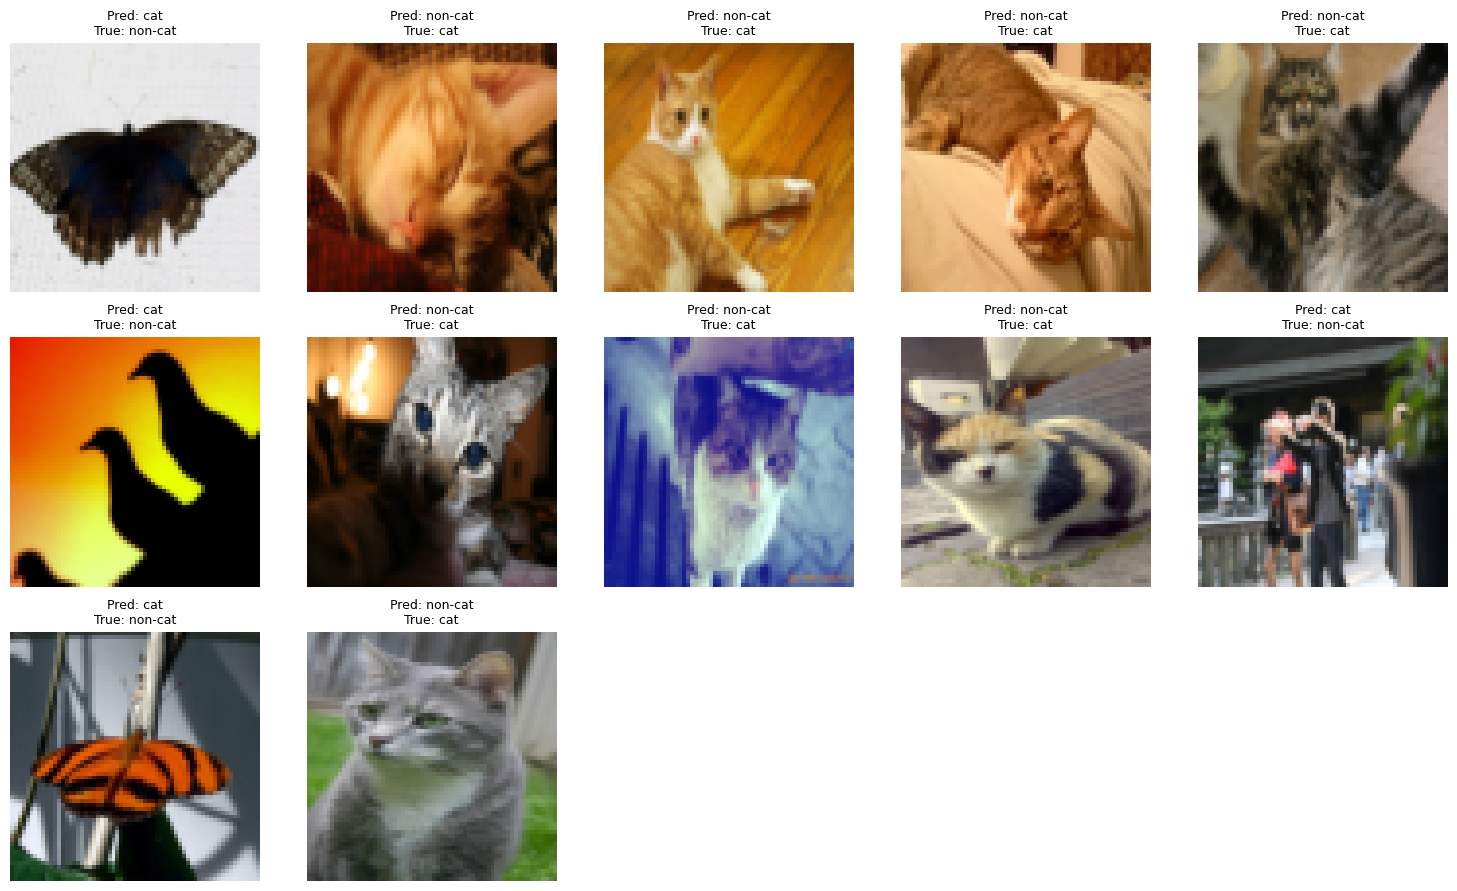

In [31]:
 y_pred,cache= L_layer_deep_forward_layer(test_X,parameters)
y_pred = (y_pred > 0.5).astype(int)
print_mislabeled_images(classes, test_X, test_y, y_pred)

In [ ]:
from PIL import Image
import imageio.v2 as imageio

my_image_name = "a.JPG"
fname = "images/" + my_image_name

image = imageio.imread(fname) / 255.0

image_rgb = image[:, :, :3]


num_px = 64
image_resized = np.array(Image.fromarray((image_rgb * 255).astype(np.uint8)).resize((num_px, num_px)))

my_image = image_resized.reshape((1, num_px * num_px * 3)).T

my_predicted_image, _ = L_layer_deep_forward_layer(my_image, parameters)

pred_label = int(np.squeeze(my_predicted_image > 0.5))
class_name = classes[pred_label].decode("utf-8") if isinstance(classes[pred_label], bytes) else classes[pred_label]

plt.imshow(image_resized)
plt.axis('off')
print(f"y = {pred_label}, your algorithm predicts a \"{class_name}\" picture.")



y = 1, your algorithm predicts a "cat" picture.
